In [1]:
import pandas as pd
import pickle
import shap

from sm_utils import load_model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/dmig/py_libs/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df_res = pd.read_pickle('bayes_result0730.pkl')

In [18]:
df_res.sort_values('target', ascending=False).head(20)

lambda_l1  lambda_l2   max_depth  num_leaves    target
57    2.792055   1.742318  268.743829  255.158478  0.967252
90    4.454810   0.435634  495.096523  254.756651  0.967030
20    3.358665   0.238432  262.384382  254.887030  0.966957
58    5.726730   0.231736  259.342600  252.768638  0.966954
106   3.566645   0.864656  256.940352  254.901723  0.966924
12    3.216373   0.894504  498.338316  255.631625  0.966883
61    5.072498   0.647627  251.507013  254.766721  0.966882
76    7.833530  11.317477  499.029545  255.765183  0.966864
77    1.663136   1.051796  498.603878  253.047340  0.966846
66    7.990238   4.386702  254.666483  255.302614  0.966822
79    5.782327   9.695720  491.839966  255.497530  0.966816
88    4.982688   1.236997  487.663253  254.829499  0.966807
83    1.815405   1.413217  483.651853  255.264123  0.966806
29    3.961600   3.636846  255.287717  255.638494  0.966775
70    1.963355   0.676914  255.109376  254.867319  0.966756
59    1.972656   4.486023  261.044368  255.353819  0.966717
50    2.795831   2.014387  269.004344  255.005300  0.966696
25    3.334421   1.319906  489.164752  255.221830  0.966696
60    3.634754  13.841972  251.796439  255.743519  0.966685
13    1.637242  98.285976  489.452268  251.136533  0.966668

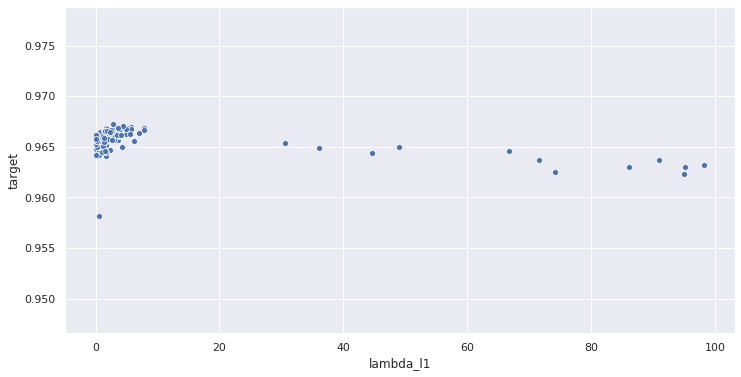

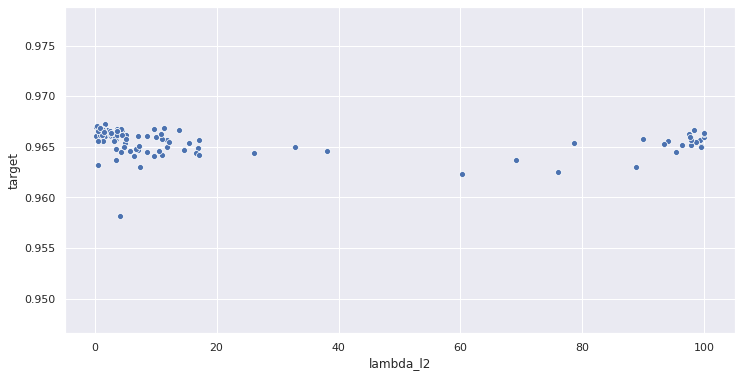

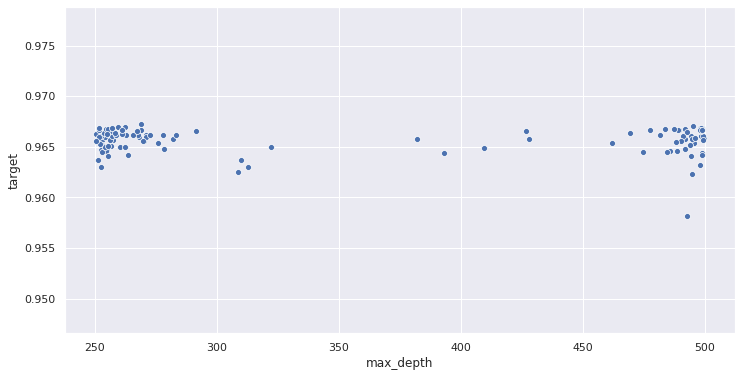

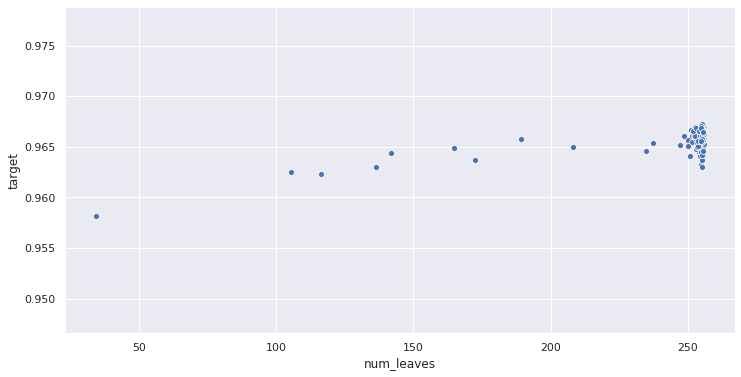

In [6]:
for col in df_res.columns:
    if col == 'target':
        continue
    
    sns.set(rc={'figure.figsize': (12,6)})
    sns.scatterplot(df_res[col], df_res['target'])
    plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

import pandas as pd
import numpy as np
import pickle
import time
import shap
import os
import gc

import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [6]:
from sm_utils import sampling, evaluate, show_results, save_model, load_model

In [9]:
x_test = pd.read_pickle('../data/x_test.pkl')
y_test = pd.read_pickle('../data/y_test.pkl')

sample_x_trn = pd.read_pickle('../data/sample_x_trn.pkl')
sample_x_val = pd.read_pickle('../data/sample_x_val.pkl')
sample_y_trn = pd.read_pickle('../data/sample_y_trn.pkl')
sample_y_val = pd.read_pickle('../data/sample_y_val.pkl')

print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)
print('sample_x_trn: ', sample_x_trn.shape)
print('sample_x_val: ', sample_x_val.shape)
print('sample_y_trn: ', sample_y_trn.shape)
print('sample_y_val: ', sample_y_val.shape)

x_test:  (3635243, 79)
y_test:  (3635243, 1)
sample_x_trn:  (1290672, 79)
sample_x_val:  (322668, 79)
sample_y_trn:  (1290672, 1)
sample_y_val:  (322668, 1)


In [10]:
feature_cols = list(x_test.columns)

In [15]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': True,
    'num_leaves': 512,
    'lambda_l1': 3,
    'lambda_l2': 1,
    'learning_rate': 0.05,
    'num_threads': 50,
}

In [16]:
lgb_trn = lgb.Dataset(sample_x_trn, sample_y_trn, feature_name=feature_cols)
lgb_val = lgb.Dataset(sample_x_val, sample_y_val, feature_name=feature_cols)

In [17]:
t1 = time.time()
clf = lgb.train(lgb_params,
                train_set=lgb_trn,
                valid_sets=[lgb_trn, lgb_val],
                num_boost_round=2000,
                early_stopping_rounds=100,
                verbose_eval=50)
print('elapsed time:', time.time()-t1)

Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.940423	valid_1's auc: 0.935541
[100]	training's auc: 0.957074	valid_1's auc: 0.950774
[150]	training's auc: 0.965701	valid_1's auc: 0.957424
[200]	training's auc: 0.971392	valid_1's auc: 0.961129
[250]	training's auc: 0.975057	valid_1's auc: 0.962461
[300]	training's auc: 0.978018	valid_1's auc: 0.963476
[350]	training's auc: 0.980227	valid_1's auc: 0.963849
[400]	training's auc: 0.982173	valid_1's auc: 0.964229
[450]	training's auc: 0.983932	valid_1's auc: 0.964514
[500]	training's auc: 0.985436	valid_1's auc: 0.964807
[550]	training's auc: 0.986946	valid_1's auc: 0.965305
[600]	training's auc: 0.988151	valid_1's auc: 0.965448
[650]	training's auc: 0.989198	valid_1's auc: 0.965606
[700]	training's auc: 0.990124	valid_1's auc: 0.965706
[750]	training's auc: 0.990976	valid_1's auc: 0.965814
[800]	training's auc: 0.991816	valid_1's auc: 0.966035
[850]	training's auc: 0.992494	valid_1's auc: 0.966037
[90

acc    recall  precision  f1_score       auc
0  0.935886  0.846675   0.203504  0.328138  0.968104

pred: 1  pred: 0
true: 1    56916    10307
true: 0   222764  3345256

feature             desc  importance
44     avg_subscription_period     평균 요금제 변경 주기       75841
5              svc_scrb_period              NaN       70953
49               real_avg_arpu          평균 ARPU       64562
6            last_equip_period              NaN       60214
46             real_arpu_bf_m1          순수 ARPU       43805
1                          age               나이       42721
48             real_arpu_bf_m3          순수 ARPU       42513
3              mng_nice_cb_scr        나이스 신용 점수       40427
47             real_arpu_bf_m2          순수 ARPU       37503
53            data_usage_ratio              NaN       34648
54  bf_m6_data_usage_ratio_avg        데이터 소진 비율       34348
9                  eqp_out_prc           단말 출고가       30948
45            avg_chg_duration         평균 기변 주기       28464
28      data_usage_in_gb_bf_m2        총 데이터 사용량       27443
27      data_usage_in_gb_bf_m1        총 데이터 사용량       27257
26      data_usage_in_gb_bf_m0              NaN       26846
17          avg_twld_visit_cnt     평균 티월드 방문 횟수       21467
7                  bas_fee_amt           요금제 가격       20392
14        twld_visit_cnt_bf_m0              NaN       19887
29        avg_data_usage_in_gb  평균 데이터 사용량 (GB)       18994

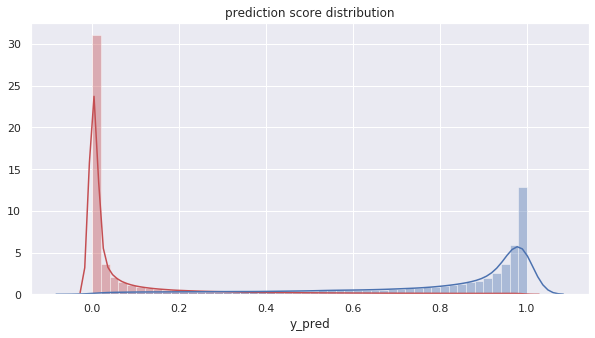

In [19]:
lgb_result_dict = evaluate(x_test, y_test.label.values, clf, 'lgb')

## real_test data

In [2]:
x_test = pd.read_pickle('../data/real_x_test.pkl')
y_test = pd.read_pickle('../data/real_y_test.pkl')

In [4]:
x_test = pd.read_pickle('../data/real_x_test.pkl')
y_test = pd.read_pickle('../data/real_y_test.pkl')

sample_x_trn = pd.read_pickle('../data/sample_x_trn.pkl')
sample_x_val = pd.read_pickle('../data/sample_x_val.pkl')
sample_y_trn = pd.read_pickle('../data/sample_y_trn.pkl')
sample_y_val = pd.read_pickle('../data/sample_y_val.pkl')

print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)
print('sample_x_trn: ', sample_x_trn.shape)
print('sample_x_val: ', sample_x_val.shape)
print('sample_y_trn: ', sample_y_trn.shape)
print('sample_y_val: ', sample_y_val.shape)

x_test:  (18580984, 79)
y_test:  (18580984, 1)
sample_x_trn:  (1290672, 79)
sample_x_val:  (322668, 79)
sample_y_trn:  (1290672, 1)
sample_y_val:  (322668, 1)


In [3]:
feature_cols = list(x_test.columns)

In [6]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': True,
    'num_leaves': 512,
    'lambda_l1': 3,
    'lambda_l2': 1,
    'learning_rate': 0.05,
    'num_threads': 50,
}

In [7]:
lgb_trn = lgb.Dataset(sample_x_trn, sample_y_trn, feature_name=feature_cols)
lgb_val = lgb.Dataset(sample_x_val, sample_y_val, feature_name=feature_cols)

In [8]:
t1 = time.time()
clf = lgb.train(lgb_params,
                train_set=lgb_trn,
                valid_sets=[lgb_trn, lgb_val],
                num_boost_round=2000,
                early_stopping_rounds=100,
                verbose_eval=50)
print('elapsed time:', time.time()-t1)

Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.940423	valid_1's auc: 0.935541
[100]	training's auc: 0.957074	valid_1's auc: 0.950774
[150]	training's auc: 0.965701	valid_1's auc: 0.957424
[200]	training's auc: 0.971392	valid_1's auc: 0.961129
[250]	training's auc: 0.975057	valid_1's auc: 0.962461
[300]	training's auc: 0.978018	valid_1's auc: 0.963476
[350]	training's auc: 0.980227	valid_1's auc: 0.963849
[400]	training's auc: 0.982173	valid_1's auc: 0.964229
[450]	training's auc: 0.983932	valid_1's auc: 0.964514
[500]	training's auc: 0.985436	valid_1's auc: 0.964807
[550]	training's auc: 0.986946	valid_1's auc: 0.965305
[600]	training's auc: 0.988151	valid_1's auc: 0.965448
[650]	training's auc: 0.989198	valid_1's auc: 0.965606
[700]	training's auc: 0.990124	valid_1's auc: 0.965706
[750]	training's auc: 0.990976	valid_1's auc: 0.965814
[800]	training's auc: 0.991816	valid_1's auc: 0.966035
[850]	training's auc: 0.992494	valid_1's auc: 0.966037
[90

In [4]:
clf = load_model('../result/bayesian_optimization/lgb_0703.pkl')

load model from  ../result/bayesian_optimization/lgb_0703.pkl


acc    recall  precision  f1_score       auc
0  0.941145  0.619945    0.23714  0.343055  0.911066

pred: 1   pred: 0
true: 1   285532    175044
true: 0   918533  17201875

feature      description  importance
44     avg_subscription_period     평균 요금제 변경 주기       75841
5              svc_scrb_period              NaN       70953
49               real_avg_arpu          평균 ARPU       64562
6            last_equip_period              NaN       60214
46             real_arpu_bf_m1          순수 ARPU       43805
1                          age               나이       42721
48             real_arpu_bf_m3          순수 ARPU       42513
3              mng_nice_cb_scr        나이스 신용 점수       40427
47             real_arpu_bf_m2          순수 ARPU       37503
53            data_usage_ratio              NaN       34648
54  bf_m6_data_usage_ratio_avg        데이터 소진 비율       34348
9                  eqp_out_prc           단말 출고가       30948
45            avg_chg_duration         평균 기변 주기       28464
28      data_usage_in_gb_bf_m2        총 데이터 사용량       27443
27      data_usage_in_gb_bf_m1        총 데이터 사용량       27257
26      data_usage_in_gb_bf_m0              NaN       26846
17          avg_twld_visit_cnt     평균 티월드 방문 횟수       21467
7                  bas_fee_amt           요금제 가격       20392
14        twld_visit_cnt_bf_m0              NaN       19887
29        avg_data_usage_in_gb  평균 데이터 사용량 (GB)       18994

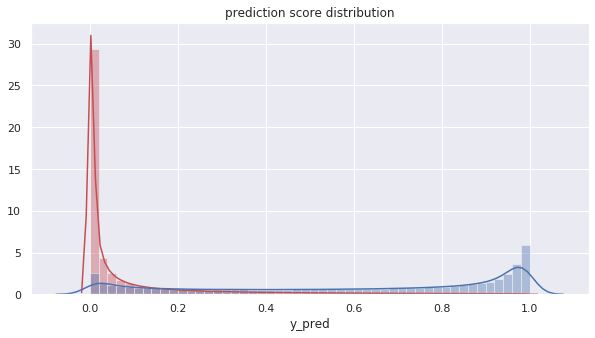

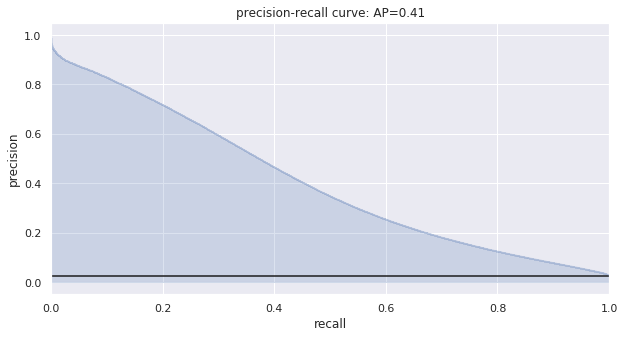

--------------------------------------------------
result dictionary save to /home/dmig/work/upsell/result/_0704_140315.pkl
save model to  /home/dmig/work/upsell/result/_0704_140315.pkl


In [7]:
lgb_result_dict = evaluate(x_test, y_test.label.values, clf, 'lgb')

In [10]:
save_model(clf, '../result/bayesian_optimization/lgb_0703.pkl')

# save_model(lgb_result_dict, '../result/model_selection/lgb_result_0703.pkl')

save model to  ../result/bayesian_optimization/lgb_0703.pkl


## for report

In [3]:
import pandas as pd

In [11]:
lgb_result_dict = pd.read_pickle('../result/bayesian_optimization/_0704_140315.pkl')

In [13]:
df_result = lgb_result_dict['result']

In [14]:
df_result.head()

y_true    y_pred  y_pred_class
0       0  0.008264             0
1       0  0.081102             0
2       0  0.038044             0
3       0  0.291239             0
4       0  0.009495             0

In [15]:
df_tmp1 = df_result.sort_values('y_pred', ascending=False).iloc[:6000000,:]
df_tmp2 = df_result.sort_values('y_pred', ascending=False).iloc[6000000:,:]

In [16]:
df_tmp1.shape, df_tmp2.shape

((6000000, 3), (12580984, 3))

In [17]:
df_tmp1.y_pred_class = 1
df_tmp2.y_pred_class = 0

In [18]:
df_tmp = pd.concat([df_tmp1, df_tmp2])

In [19]:
df_tmp.shape

(18580984, 3)

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, average_precision_score

In [21]:
y_true = df_tmp.y_true
y_pred = df_result.y_pred
y_pred_class = df_tmp.y_pred_class

df_metrics = pd.DataFrame({'acc': accuracy_score(y_true, y_pred_class),
                           'recall': recall_score(y_true, y_pred_class),
                           'precision': precision_score(y_true, y_pred_class),
                           'f1_score': f1_score(y_true, y_pred_class),
                           'auc': roc_auc_score(df_result.y_true, y_pred)}, index=[0])
display(df_metrics)

acc    recall  precision  f1_score       auc
0  0.697697  0.915679    0.07029  0.130558  0.911066